In [1]:
import pandas as pd
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_excel("batting_data_2016.xlsx")
df    

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Fernando Abad*\abadfe01,30,TOT,AL,4,1,1,0,0,...,0.000,0.000,-100.0,0,0,0,0,0,0,1
1,4,Jose Abreu\abreujo02,29,CHW,AL,159,695,624,67,183,...,0.468,0.820,124.0,292,21,15,0,9,7,*3/D
2,5,A.J. Achter\achteaj01,27,LAA,AL,3,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,1
3,6,Dustin Ackley*\ackledu01,28,NYY,AL,28,70,61,6,9,...,0.148,0.390,9.0,9,0,0,0,1,0,3/9D4
4,7,Cristhian Adames#\adamecr01,24,COL,NL,121,256,225,25,49,...,0.302,0.607,53.0,68,5,4,3,0,0,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1466,Brad Ziegler\zieglbr01,36,TOT,MLB,35,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,1
1243,1469,Ryan Zimmerman\zimmery01,31,WSN,NL,115,467,427,60,93,...,0.370,0.642,67.0,158,12,5,0,6,1,*3/D
1244,1470,Jordan Zimmermann\zimmejo02,30,DET,AL,3,5,4,0,1,...,0.250,0.500,37.0,1,0,0,1,0,0,1
1245,1471,Ben Zobrist#\zobribe01,35,CHC,NL,147,631,523,94,142,...,0.446,0.831,121.0,233,17,4,4,4,6,*479/36


In [3]:
df['Name'] = df['Name'].str.replace(r"\W?\\\S+", "")
df['Name'] = df['Name'].str.replace(r"\s", "")

In [9]:
df = df.set_index('Name')

In [10]:
df

,Rk,Age,Tm,Lg,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
Name,,,,,,,,,,,,,,,,,,,,,
FernandoAbad,1,30,TOT,AL,4,1,1,0,0,0,...,0.000,0.000,-100.0,0,0,0,0,0,0,1
JoseAbreu,4,29,CHW,AL,159,695,624,67,183,32,...,0.468,0.820,124.0,292,21,15,0,9,7,*3/D
A.J.Achter,5,27,LAA,AL,3,0,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,1
DustinAckley,6,28,NYY,AL,28,70,61,6,9,0,...,0.148,0.390,9.0,9,0,0,0,1,0,3/9D4
CristhianAdames,7,24,COL,NL,121,256,225,25,49,7,...,0.302,0.607,53.0,68,5,4,3,0,0,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BradZiegler,1466,36,TOT,MLB,35,0,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,1
RyanZimmerman,1469,31,WSN,NL,115,467,427,60,93,18,...,0.370,0.642,67.0,158,12,5,0,6,1,*3/D
JordanZimmermann,1470,30,DET,AL,3,5,4,0,1,0,...,0.250,0.500,37.0,1,0,0,1,0,0,1


In [11]:
arod = df.loc["AlexRodriguez"]

In [12]:
ortiz = df.loc["DavidOrtiz"]

In [13]:
ortiz

Rk               974
Age               40
Tm               BOS
Lg                AL
G                151
PA               626
AB               537
R                 79
H                169
2B                48
3B                 1
HR                38
RBI              127
SB                 2
CS                 0
BB                80
SO                86
BA             0.315
OBP            0.401
SLG             0.62
OPS            1.021
OPS+             164
TB               333
GDP               22
HBP                2
SH                 0
SF                 7
IBB               15
Pos Summary     *D/3
Name: DavidOrtiz, dtype: object

In [14]:
ortiz = ortiz.to_dict()
arod = arod.to_dict()

In [15]:
ortiz

{'Rk': 974,
 'Age': 40,
 'Tm': 'BOS',
 'Lg': 'AL',
 'G': 151,
 'PA': 626,
 'AB': 537,
 'R': 79,
 'H': 169,
 '2B': 48,
 '3B': 1,
 'HR': 38,
 'RBI': 127,
 'SB': 2,
 'CS': 0,
 'BB': 80,
 'SO': 86,
 'BA': 0.315,
 'OBP': 0.401,
 'SLG': 0.62,
 'OPS': 1.021,
 'OPS+': 164.0,
 'TB': 333,
 'GDP': 22,
 'HBP': 2,
 'SH': 0,
 'SF': 7,
 'IBB': 15,
 'Pos\xa0Summary': '*D/3'}

In [17]:
arod

{'Rk': 1137,
 'Age': 40,
 'Tm': 'NYY',
 'Lg': 'AL',
 'G': 65,
 'PA': 243,
 'AB': 225,
 'R': 19,
 'H': 45,
 '2B': 7,
 '3B': 0,
 'HR': 9,
 'RBI': 31,
 'SB': 3,
 'CS': 0,
 'BB': 14,
 'SO': 67,
 'BA': 0.2,
 'OBP': 0.247,
 'SLG': 0.351,
 'OPS': 0.598,
 'OPS+': 58.0,
 'TB': 79,
 'GDP': 4,
 'HBP': 1,
 'SH': 0,
 'SF': 3,
 'IBB': 0,
 'Pos\xa0Summary': 'D/5'}

In [18]:
ortiz_runs_created = ((ortiz['H'] + ortiz['BB'] + ortiz['HBP']) * ortiz['TB'])/(ortiz['AB'] + ortiz['BB'] + ortiz['HBP'])
ortiz_runs_created

135.02907915993538

In [19]:
arod_runs_created = ((arod['H'] + arod['BB'] + arod['HBP']) * arod['TB'])/(arod['AB'] + arod['BB'] + arod['HBP'])
arod_runs_created

19.75

In [20]:
ortiz_runs_created_pg = ortiz_runs_created/(((.982 * ortiz['AB']) - ortiz['H'] + ortiz['GDP'] + ortiz['SF'] + ortiz['SH'] + ortiz['CS'])/25.82)
ortiz_runs_created_pg

9.001148424640057

In [21]:
arod_runs_created_pg = arod_runs_created/(((.982 * arod['AB']) - arod['H'] + arod['GDP'] + arod['SF'] + arod['SH'] + arod['CS'])/25.82)
arod_runs_created_pg

2.7873462694725335

In [75]:
o_df = pd.read_csv('ortizadvanced.csv')
o_df['Name'] = "David Ortiz"
o_df = o_df.set_index('Name')
a_df = pd.read_csv('arodadvanced.csv')
a_df['Name'] = "Alex Rodriguez"
a_df = a_df.set_index('Name')

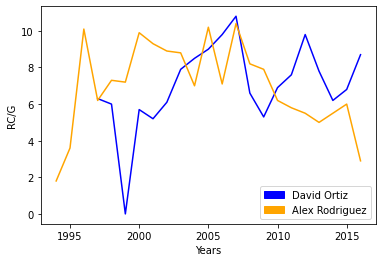

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.plot(o_df['Year'], o_df['RC/G'], color='blue')
plt.plot(a_df['Year'], a_df['RC/G'], color='orange')
plt.xlabel('Years')
plt.ylabel("RC/G")
blue_patch = mpatches.Patch(color='blue', label='David Ortiz')
orange_patch = mpatches.Patch(color='orange', label='Alex Rodriguez')
plt.legend(handles=[blue_patch, orange_patch])
plt.show()


In [102]:
df = pd.read_excel("batting_data_2010-2018.xlsx")
df    

,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,David Aardsma\aardsda01,28,SEA,AL,4,0,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0.0,1
1,Fernando Abad*\abadfe01,24,HOU,NL,22,1,1,0,0,0,...,0.000,0.000,-100.0,0,0,0,0,0,0.0,1
2,Bobby Abreu*\abreubo01,36,LAA,AL,154,667,573,88,146,41,...,0.435,0.787,118.0,249,13,2,0,5,3.0,*97D
3,Tony Abreu#\abreuto01,25,ARI,NL,81,201,193,16,45,11,...,0.316,0.560,47.0,61,8,0,0,4,0.0,564/D
4,Alfredo Aceves\aceveal01,27,NYY,AL,1,0,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10923,Bradley Zimmer*\zimmebr01,25,CLE,AL,34,114,106,14,24,5,...,0.330,0.611,65.0,35,1,1,0,0,0.0,8
10924,Ryan Zimmerman\zimmery01,33,WSN,NL,85,323,288,33,76,21,...,0.486,0.824,114.0,140,10,3,0,2,1.0,3
10925,Jordan Zimmermann\zimmejo02,32,DET,AL,2,2,2,0,0,0,...,0.000,0.000,-100.0,0,0,0,0,0,0.0,1
10926,Ben Zobrist#\zobribe01,37,CHC,NL,139,520,455,67,139,28,...,0.440,0.817,117.0,200,8,2,1,7,1.0,497/3D


In [103]:
df = df[df['H'] > 0]
df = df[['BB', 'HBP', 'H', 'R', '2B', '3B', 'HR', 'SB', 'CS']]

In [104]:
df['BB_HPB'] = df['BB'] + df['HBP']
df['1B'] = df['H'] - df['2B'] - df['3B'] - df['HR']
del df['BB']
del df['HBP']
del df['H']

In [105]:
df

,R,2B,3B,HR,SB,CS,BB_HPB,1B
2,88,41,1,20,24,10,89,84
3,16,11,1,1,2,1,4,32
9,0,0,1,0,0,0,0,0
10,4,1,0,1,0,0,0,7
11,5,3,0,1,0,0,10,8
...,...,...,...,...,...,...,...,...
10918,0,1,0,0,0,0,1,1
10923,14,5,0,2,4,1,8,17
10924,33,21,2,13,1,1,33,40
10926,67,28,3,9,3,4,57,99


In [113]:
X = df.drop('R', axis = 1)
Y = df["R"]

#Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print(X_train)
print(X_test)
# Fit the model
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

       2B  3B  HR  SB  CS  BB_HPB   1B
10640   3   1   6   3   1       5   17
7033    0   0   0   0   0       2    5
4103    0   0   0   0   0       0    3
3336   32   4   7   9   4      44  147
4226    1   0   1   0   0       7    6
...    ..  ..  ..  ..  ..     ...  ...
1387    2   0   0   0   0       1    2
8119    0   0   0   0   0       0    1
6162    5   0   0   3   2      11   26
361     1   0   0   0   0       0    1
8065    6   0   1   0   0      19   19

[5883 rows x 7 columns]
       2B  3B  HR  SB  CS  BB_HPB  1B
10300   1   0   0   4   0       3   1
2860    7   2   2   1   1       3  29
6669    7   3   4   2   2      24  12
8314   30   1  31   2   4      32  82
8972   33   1   6   7   4      22  78
...    ..  ..  ..  ..  ..     ...  ..
1548    1   0   1   0   1      10  10
6346   10   2   2   4   1      10  28
5111   25   8  17  21   5      62  92
3495    3   0   1   0   0       0   6
3577   24   0  28   7   2      72  65

[1039 rows x 7 columns]


LinearRegression()

In [114]:
intercept = regression_model.intercept_
coefficent = regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for coef in zip(X.columns, regression_model.coef_):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.1568
----------------------------------------------------------------------------------------------------
The Coefficient for 2B is 0.43
The Coefficient for 3B is 1.2
The Coefficient for HR is 0.93
The Coefficient for SB is 0.38
The Coefficient for CS is 0.16
The Coefficient for BB_HPB is 0.23
The Coefficient for 1B is 0.25


In [115]:
Y_predict = regression_model.predict(X_test)
model_r2 = r2_score(Y_test, Y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.97


In [116]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
model = sm.OLS(Y, X2)
# fit the data
est = model.fit()
est.pvalues

const      1.095734e-01
2B        4.199805e-189
3B        4.844378e-153
HR         0.000000e+00
SB        7.173345e-153
CS         2.629573e-05
BB_HPB     0.000000e+00
1B         0.000000e+00
dtype: float64

In [117]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:52:27   Log-Likelihood:                -20692.
No. Observations:                6922   AIC:                         4.140e+04
Df Residuals:                    6914   BIC:                         4.145e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1310      0.082     -1.600      0.1

In [118]:
ortiz_prediction = regression_model.predict([[ortiz['2B'], ortiz['3B'], ortiz['HR'], ortiz['SB'], ortiz['CS'], ortiz['BB'] + ortiz['HBP'], ortiz['H']-ortiz['2B']-ortiz['3B']-ortiz['HR']]])
ortiz_prediction

array([96.92249864])

In [119]:
arod_prediction = regression_model.predict([[arod['2B'], arod['3B'], arod['HR'], arod['SB'], arod['CS'], arod['BB'] + arod['HBP'], arod['H']-arod['2B']-arod['3B']-arod['HR']]])
arod_prediction

array([23.00232446])